In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

target      1.000000
mfccs_0     0.537839
mfccs_1     0.537839
mfccs_2     0.537839
mfccs_3     0.537839
mfccs_4     0.537839
mfccs_5     0.034398
mfccs_6     0.001538
mfccs_7    -0.148107
mfccs_8    -0.302087
mfccs_9    -0.302087
mfccs_10   -0.302087
mfccs_11   -0.302087
mfccs_12   -0.302087
Name: target, dtype: float64

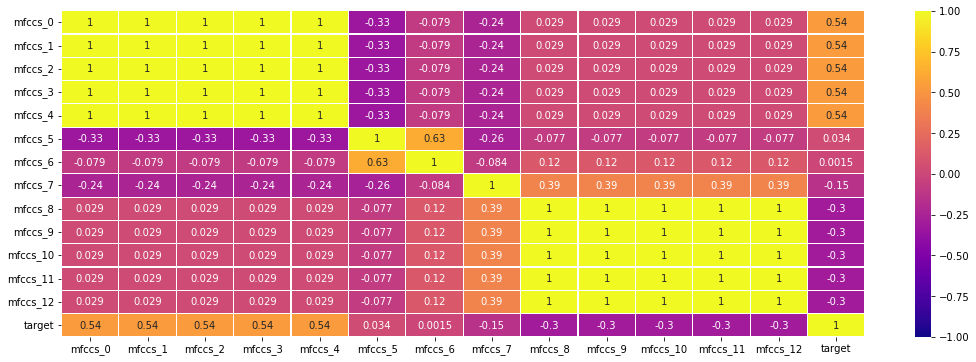

In [2]:
from sklearn.preprocessing import LabelEncoder
#Read and add target column
df = pd.read_csv('df_6dBfan_id06.csv')
#rename columns
new_names = [(i,'mfccs_'+ i) for i in df.iloc[:, 0:-1].columns.values]
df.rename(columns = dict(new_names), inplace=True)
# label encode target
label = LabelEncoder()
df['target'] = label.fit_transform(df['target'])

#EDA
correlation = df.corr()
plt.figure(figsize=(18, 6))
sns.heatmap(correlation, annot=True, linewidths=0.1, vmin=-1, cmap="plasma")
correlation['target'].sort_values(ascending=False)
#Feature engineeing delta and delta2

,mfccs_0,mfccs_1,mfccs_2,mfccs_3,mfccs_4,mfccs_5,mfccs_6,mfccs_7,mfccs_8,mfccs_9,mfccs_10,mfccs_11,mfccs_12,target
0,-23.736887,-23.736887,-23.736887,-23.736887,-23.736887,9.306312,-2.188876,2.634635,-1.551752,-1.551752,-1.551752,-1.551752,-1.551752,1
1,-24.460040,-24.460040,-24.460040,-24.460040,-24.460040,9.101080,-2.245494,2.374541,-1.667180,-1.667180,-1.667180,-1.667180,-1.667180,1
2,-23.644175,-23.644175,-23.644175,-23.644175,-23.644175,9.696537,-2.064678,2.240950,-1.998280,-1.998280,-1.998280,-1.998280,-1.998280,1
3,-22.949371,-22.949371,-22.949371,-22.949371,-22.949371,9.182064,-2.332787,2.320142,-1.690257,-1.690257,-1.690257,-1.690257,-1.690257,1
4,-24.090183,-24.090183,-24.090183,-24.090183,-24.090183,9.243928,-2.254887,2.531480,-1.460413,-1.460413,-1.460413,-1.460413,-1.460413,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,-22.212831,-22.212831,-22.212831,-22.212831,-22.212831,8.900132,-2.306757,2.092818,-1.190548,-1.190548,-1.190548,-1.190548,-1.190548,0
752,-27.449894,-27.449894,-27.449894,-27.449894,-27.449894,8.127893,-2.658713,2.216237,-1.699850,-1.699850,-1.699850,-1.699850,-1.699850,0
753,-26.345245,-26.345245,-26.345245,-26.345245,-26.345245,10.145435,-1.425569,1.582108,-2.418502,-2.418502,-2.418502,-2.418502,-2.418502,0
754,-25.985680,-25.985680,-25.985680,-25.985680,-25.985680,9.665339,-1.691473,1.801075,-2.098227,-2.098227,-2.098227,-2.098227,-2.098227,0


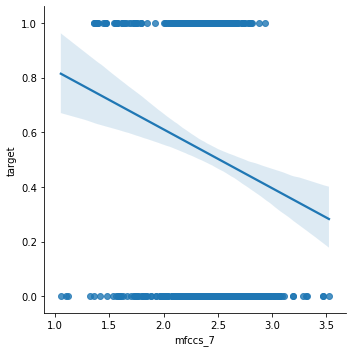

In [3]:
sns.lmplot(x='mfccs_7', y='target', data=df)
df

In [4]:
X = df.drop(['target'],axis=1)
# X = df['features']
y = df.target

#Normalise X
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.714957,0.714957,0.714957,0.714957,0.714957,0.560299,0.509555,0.640210,0.528612,0.528612,0.528612,0.528612,0.528612
1,0.611607,0.611607,0.611607,0.611607,0.611607,0.506011,0.493101,0.534917,0.467978,0.467978,0.467978,0.467978,0.467978
2,0.728206,0.728206,0.728206,0.728206,0.728206,0.663521,0.545649,0.480836,0.294053,0.294053,0.294053,0.294053,0.294053
3,0.827504,0.827504,0.827504,0.827504,0.827504,0.527433,0.467732,0.512895,0.455856,0.455856,0.455856,0.455856,0.455856
4,0.664465,0.664465,0.664465,0.664465,0.664465,0.543797,0.490371,0.598450,0.576592,0.576592,0.576592,0.576592,0.576592
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.932767,0.932767,0.932767,0.932767,0.932767,0.452856,0.475297,0.420869,0.718351,0.718351,0.718351,0.718351,0.718351
752,0.184313,0.184313,0.184313,0.184313,0.184313,0.248583,0.373011,0.470832,0.450817,0.450817,0.450817,0.450817,0.450817
753,0.342184,0.342184,0.342184,0.342184,0.342184,0.782264,0.731388,0.214121,0.073312,0.073312,0.073312,0.073312,0.073312
754,0.393571,0.393571,0.393571,0.393571,0.393571,0.655269,0.654111,0.302764,0.241551,0.241551,0.241551,0.241551,0.241551


In [5]:
#split training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

#models
rfc = RandomForestClassifier(n_estimators= 50)
lr = LogisticRegression(solver='lbfgs')
knn = KNeighborsClassifier(n_neighbors=3)

model = rfc

#Train the model
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

Best Threshold=0.900000, G-Mean=1.000


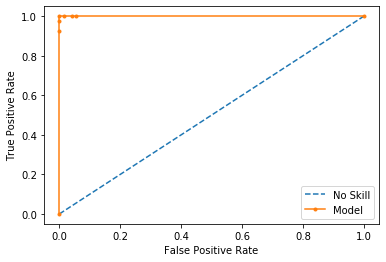

In [6]:
from numpy import sqrt
from numpy import argmax

'''Reference https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/'''

# predict probabilities
lr_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))



# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [7]:
#Predict
y_pred = model.predict(X_test)

#accuracy
print(model.score(X_test, y_test))
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

1.0
Accuracy: 1.0


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,73,0,73
1,0,79,79
All,73,79,152


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        79

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

